In [1]:
import requests
import warnings
warnings.filterwarnings("ignore")

In [2]:
url = "https://fbref.com/en/comps/9/Premier-League-Stats"

In [3]:
data_url = requests.get(url)

In [4]:
data_url

<Response [200]>

In [5]:
type(data_url)

requests.models.Response

In [6]:
html_text = data_url.text
html_text

'    \n      \n<!DOCTYPE html>\n<html data-version="klecko-" data-root="/home/fb/deploy/www/base" lang="en" class="no-js" >\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0" />\n    <link rel="dns-prefetch" href="https://cdn.ssref.net/req/202403271" />\n<!-- InMobi Choice. Consent Manager Tag v3.0 (for TCF 2.2) -->\n<script type="text/javascript" async=true>\n(function() {\n  var host = window.location.hostname;\n  var element = document.createElement(\'script\');\n  var firstScript = document.getElementsByTagName(\'script\')[0];\n  var url = \'https://cmp.inmobi.com\'\n    .concat(\'/choice/\', \'XwNYEpNeFfhfr\', \'/\', host, \'/choice.js?tag_version=V3\');\n  var uspTries = 0;\n  var uspTriesLimit = 3;\n  element.async = true;\n  element.type = \'text/javascript\';\n  element.src = url;\n\n  firstScript.parentNode.insertBefore(element, firstScript

In [7]:
import pandas as pd
table_data = pd.read_html(html_text)
table_data

[    Rk            Squad  MP   W  D   L  GF  GA  GD  Pts  Pts/MP    xG   xGA  \
 0    1          Arsenal  28  20  4   4  70  24  46   64    2.29  56.6  19.4   
 1    2        Liverpool  28  19  7   2  65  26  39   64    2.29  62.6  34.5   
 2    3  Manchester City  28  19  6   3  63  28  35   63    2.25  56.6  27.6   
 3    4      Aston Villa  30  18  5   7  62  42  20   59    1.97  52.7  43.3   
 4    5        Tottenham  29  17  5   7  61  43  18   56    1.93  52.3  46.8   
 5    6   Manchester Utd  29  15  3  11  40  40   0   48    1.66  43.8  50.0   
 6    7         West Ham  30  12  8  10  49  54  -5   44    1.47  42.3  54.4   
 7    8    Newcastle Utd  29  13  4  12  63  51  12   43    1.48  54.6  50.5   
 8    9         Brighton  28  11  9   8  50  44   6   42    1.50  45.5  38.7   
 9   10           Wolves  29  12  5  12  42  46  -4   41    1.41  39.1  48.9   
 10  11          Chelsea  28  11  7  10  49  47   2   40    1.43  54.2  41.8   
 11  12           Fulham  30  11  6  13 

In [8]:
type(table_data)

list

In [9]:
table_data[0].head(5)

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Arsenal,28,20,4,4,70,24,46,64,2.29,56.6,19.4,37.2,1.33,W W W W W,60213,Bukayo Saka - 13,David Raya,NaN
1,2,Liverpool,28,19,7,2,65,26,39,64,2.29,62.6,34.5,28.1,1.00,W W W W D,54519,Mohamed Salah - 15,Alisson,NaN
2,3,Manchester City,28,19,6,3,63,28,35,63,2.25,56.6,27.6,29.0,1.04,D W W W D,52996,Erling Haaland - 18,Ederson,NaN
3,4,Aston Villa,30,18,5,7,62,42,20,59,1.97,52.7,43.3,9.3,0.31,W W L D W,38918,Ollie Watkins - 16,Emiliano Martínez,NaN
4,5,Tottenham,29,17,5,7,61,43,18,56,1.93,52.3,46.8,5.5,0.19,L W W L W,61553,Son Heung-min - 15,Guglielmo Vicario,NaN


In [10]:
table_data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               20 non-null     int64  
 1   Squad            20 non-null     object 
 2   MP               20 non-null     int64  
 3   W                20 non-null     int64  
 4   D                20 non-null     int64  
 5   L                20 non-null     int64  
 6   GF               20 non-null     int64  
 7   GA               20 non-null     int64  
 8   GD               20 non-null     int64  
 9   Pts              20 non-null     int64  
 10  Pts/MP           20 non-null     float64
 11  xG               20 non-null     float64
 12  xGA              20 non-null     float64
 13  xGD              20 non-null     float64
 14  xGD/90           20 non-null     float64
 15  Last 5           20 non-null     object 
 16  Attendance       20 non-null     int64  
 17  Top Team Scorer  2

In [11]:
club_data1 = table_data[0].iloc[:, [1,6,7,8,11,12,13]]
club_data1

,Squad,GF,GA,GD,xG,xGA,xGD
0,Arsenal,70,24,46,56.6,19.4,37.2
1,Liverpool,65,26,39,62.6,34.5,28.1
2,Manchester City,63,28,35,56.6,27.6,29.0
3,Aston Villa,62,42,20,52.7,43.3,9.3
4,Tottenham,61,43,18,52.3,46.8,5.5
5,Manchester Utd,40,40,0,43.8,50.0,-6.3
6,West Ham,49,54,-5,42.3,54.4,-12.2
7,Newcastle Utd,63,51,12,54.6,50.5,4.2
8,Brighton,50,44,6,45.5,38.7,6.8
9,Wolves,42,46,-4,39.1,48.9,-9.8


In [12]:
table_data[2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   (Unnamed: 0_level_0, Squad)  20 non-null     object 
 1   (Unnamed: 1_level_0, # Pl)   20 non-null     int64  
 2   (Unnamed: 2_level_0, Age)    20 non-null     float64
 3   (Unnamed: 3_level_0, Poss)   20 non-null     float64
 4   (Playing Time, MP)           20 non-null     int64  
 5   (Playing Time, Starts)       20 non-null     int64  
 6   (Playing Time, Min)          20 non-null     int64  
 7   (Playing Time, 90s)          20 non-null     float64
 8   (Performance, Gls)           20 non-null     int64  
 9   (Performance, Ast)           20 non-null     int64  
 10  (Performance, G+A)           20 non-null     int64  
 11  (Performance, G-PK)          20 non-null     int64  
 12  (Performance, PK)            20 non-null     int64  
 13  (Performance, PKatt)  

In [13]:
club_data2 = table_data[2].iloc[:, [0,2,3,9,14,15,18,20,21]]
club_data2

Unnamed: 0_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0 Performance       \
                Squad                Age               Poss         Ast CrdY   
0             Arsenal               25.6               61.5          47   43   
1         Aston Villa               27.6               54.9          43   79   
2         Bournemouth               26.4               45.0          31   58   
3           Brentford               27.4               44.6          26   72   
4            Brighton               26.7               62.3          35   70   
5             Burnley               25.2               46.1          23   64   
6             Chelsea               25.0               58.5          34   88   
7      Crystal Palace               27.6               41.8          25   55   
8             Everton               27.5               40.6          14   61   
9              Fulham               29.3               50.5          33   70   
10          Liverpool               27.1               60.1          48   53   
11         Luton Town               27.4               41.9          28   59   
12    Manchester City               27.3               65.0          47   47   
13     Manchester Utd               27.0               50.5          27   69   
14      Newcastle Utd               28.0               53.1          40   62   
15    Nott'ham Forest               26.4               40.9          31   70   
16      Sheffield Utd               26.6               35.4          13   87   
17          Tottenham               25.9               60.9          48   69   
18           West Ham               28.9               41.4          35   71   
19             Wolves               27.4               48.0          32   74   

        Expected Progression        
   CrdR      xAG        PrgC  PrgP  
0     2     39.4         628  1638  
1     2     39.0         648  1235  
2     2     32.2         544  1034  
3     2     33.6         377  1030  
4     3     33.3         637  1402  
5     6     22.0         530   885  
6     3     37.5         637  1215  
7     1     26.5         374   858  
8     1     31.1         392   882  
9     3     29.3         513  1151  
10    5     45.5         658  1463  
11    0     25.1         545   864  
12    2     43.5         853  1503  
13    1     31.4         570  1151  
14    1     35.1         536  1188  
15    3     30.1         454   887  
16    4     16.9         242   627  
17    4     44.9         732  1590  
18    3     28.1         447   957  
19    3     27.3         546   940

In [14]:
club_data2.columns = club_data2.columns.map(lambda x: x[1].split(',')[0].replace(" ", ""))
club_data2

,Squad,Age,Poss,Ast,CrdY,CrdR,xAG,PrgC,PrgP
0,Arsenal,25.6,61.5,47,43,2,39.4,628,1638
1,Aston Villa,27.6,54.9,43,79,2,39.0,648,1235
2,Bournemouth,26.4,45.0,31,58,2,32.2,544,1034
3,Brentford,27.4,44.6,26,72,2,33.6,377,1030
4,Brighton,26.7,62.3,35,70,3,33.3,637,1402
5,Burnley,25.2,46.1,23,64,6,22.0,530,885
6,Chelsea,25.0,58.5,34,88,3,37.5,637,1215
7,Crystal Palace,27.6,41.8,25,55,1,26.5,374,858
8,Everton,27.5,40.6,14,61,1,31.1,392,882
9,Fulham,29.3,50.5,33,70,3,29.3,513,1151


In [15]:
table_data[4].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   (Unnamed: 0_level_0, Squad)  20 non-null     object 
 1   (Unnamed: 1_level_0, # Pl)   20 non-null     int64  
 2   (Playing Time, MP)           20 non-null     int64  
 3   (Playing Time, Starts)       20 non-null     int64  
 4   (Playing Time, Min)          20 non-null     int64  
 5   (Playing Time, 90s)          20 non-null     float64
 6   (Performance, GA)            20 non-null     int64  
 7   (Performance, GA90)          20 non-null     float64
 8   (Performance, SoTA)          20 non-null     int64  
 9   (Performance, Saves)         20 non-null     int64  
 10  (Performance, Save%)         20 non-null     float64
 11  (Performance, W)             20 non-null     int64  
 12  (Performance, D)             20 non-null     int64  
 13  (Performance, L)      

In [16]:
club_data3 = table_data[4].iloc[:, [0,14]]
club_data3.columns = club_data3.columns.map(lambda x: x[1].split(',')[0].replace(" ", ""))
club_data3

,Squad,CS
0,Arsenal,11
1,Aston Villa,7
2,Bournemouth,6
3,Brentford,4
4,Brighton,4
5,Burnley,2
6,Chelsea,5
7,Crystal Palace,6
8,Everton,8
9,Fulham,8


In [17]:
table_data[8].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   (Unnamed: 0_level_0, Squad)  20 non-null     object 
 1   (Unnamed: 1_level_0, # Pl)   20 non-null     int64  
 2   (Unnamed: 2_level_0, 90s)    20 non-null     float64
 3   (Standard, Gls)              20 non-null     int64  
 4   (Standard, Sh)               20 non-null     int64  
 5   (Standard, SoT)              20 non-null     int64  
 6   (Standard, SoT%)             20 non-null     float64
 7   (Standard, Sh/90)            20 non-null     float64
 8   (Standard, SoT/90)           20 non-null     float64
 9   (Standard, G/Sh)             20 non-null     float64
 10  (Standard, G/SoT)            20 non-null     float64
 11  (Standard, Dist)             20 non-null     float64
 12  (Standard, FK)               20 non-null     int64  
 13  (Standard, PK)        

In [18]:
club_data4 = table_data[8].iloc[:, [0,4,5]]
club_data4.columns = club_data4.columns.map(lambda x: x[1].split(',')[0].replace(" ", ""))
club_data4

,Squad,Sh,SoT
0,Arsenal,470,153
1,Aston Villa,428,157
2,Bournemouth,409,136
3,Brentford,389,125
4,Brighton,414,160
5,Burnley,325,101
6,Chelsea,381,133
7,Crystal Palace,336,112
8,Everton,403,124
9,Fulham,396,139


In [19]:
table_data[10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   (Unnamed: 0_level_0, Squad)   20 non-null     object 
 1   (Unnamed: 1_level_0, # Pl)    20 non-null     int64  
 2   (Unnamed: 2_level_0, 90s)     20 non-null     float64
 3   (Total, Cmp)                  20 non-null     int64  
 4   (Total, Att)                  20 non-null     int64  
 5   (Total, Cmp%)                 20 non-null     float64
 6   (Total, TotDist)              20 non-null     int64  
 7   (Total, PrgDist)              20 non-null     int64  
 8   (Short, Cmp)                  20 non-null     int64  
 9   (Short, Att)                  20 non-null     int64  
 10  (Short, Cmp%)                 20 non-null     float64
 11  (Medium, Cmp)                 20 non-null     int64  
 12  (Medium, Att)                 20 non-null     int64  
 13  (Medium

In [20]:
club_data5 = table_data[10].iloc[:, [0,5]]
club_data5.columns = club_data5.columns.map(lambda x: x[1].split(',')[0].replace(" ", ""))
club_data5

,Squad,Cmp%
0,Arsenal,85.0
1,Aston Villa,83.6
2,Bournemouth,74.9
3,Brentford,74.3
4,Brighton,87.4
5,Burnley,77.0
6,Chelsea,85.4
7,Crystal Palace,76.6
8,Everton,73.1
9,Fulham,80.7


In [21]:
club_data = pd.merge(pd.merge(pd.merge(pd.merge(club_data1, club_data2, on='Squad'), 
                                       club_data3, on='Squad'), club_data4, on='Squad'), club_data5, on='Squad')
club_data.head(10)

,Squad,GF,GA,GD,xG,xGA,xGD,Age,Poss,Ast,CrdY,CrdR,xAG,PrgC,PrgP,CS,Sh,SoT,Cmp%
0,Arsenal,70,24,46,56.6,19.4,37.2,25.6,61.5,47,43,2,39.4,628,1638,11,470,153,85.0
1,Liverpool,65,26,39,62.6,34.5,28.1,27.1,60.1,48,53,5,45.5,658,1463,9,534,181,83.0
2,Manchester City,63,28,35,56.6,27.6,29.0,27.3,65.0,47,47,2,43.5,853,1503,8,499,187,88.2
3,Aston Villa,62,42,20,52.7,43.3,9.3,27.6,54.9,43,79,2,39.0,648,1235,7,428,157,83.6
4,Tottenham,61,43,18,52.3,46.8,5.5,25.9,60.9,48,69,4,44.9,732,1590,6,448,161,85.2
5,Manchester Utd,40,40,0,43.8,50.0,-6.3,27.0,50.5,27,69,1,31.4,570,1151,8,408,133,80.4
6,West Ham,49,54,-5,42.3,54.4,-12.2,28.9,41.4,35,71,3,28.1,447,957,5,353,114,76.3
7,Newcastle Utd,63,51,12,54.6,50.5,4.2,28.0,53.1,40,62,1,35.1,536,1188,8,395,142,81.8
8,Brighton,50,44,6,45.5,38.7,6.8,26.7,62.3,35,70,3,33.3,637,1402,4,414,160,87.4
9,Wolves,42,46,-4,39.1,48.9,-9.8,27.4,48.0,32,74,3,27.3,546,940,5,340,119,80.1


In [22]:
team_1 = "Arsenal"
team_2 = "Manchester City"

selected_club_data = club_data[(club_data['Squad']==team_1) | (club_data['Squad']==team_2)].reset_index()
selected_club_data

,index,Squad,GF,GA,GD,xG,xGA,xGD,Age,Poss,Ast,CrdY,CrdR,xAG,PrgC,PrgP,CS,Sh,SoT,Cmp%
0,0,Arsenal,70,24,46,56.6,19.4,37.2,25.6,61.5,47,43,2,39.4,628,1638,11,470,153,85.0
1,2,Manchester City,63,28,35,56.6,27.6,29.0,27.3,65.0,47,47,2,43.5,853,1503,8,499,187,88.2


In [23]:
selected_metrics = ['GF','GA','xG','xGA','Ast','xAG','Poss','Cmp%','CS','Sh','SoT']
metrics = ['Squad']+selected_metrics

selected_club_data = selected_club_data[metrics]
selected_club_data

,Squad,GF,GA,xG,xGA,Ast,xAG,Poss,Cmp%,CS,Sh,SoT
0,Arsenal,70,24,56.6,19.4,47,39.4,61.5,85.0,11,470,153
1,Manchester City,63,28,56.6,27.6,47,43.5,65.0,88.2,8,499,187


In [79]:
ranges = []

In [80]:
for x in selected_metrics:
    a = min(selected_club_data[selected_metrics][x])
    a = int(a - (a*.25))
    
    b = max(selected_club_data[selected_metrics][x])
    b = int(b + (b*.25))
    
    ranges.append((a,b))

ranges

[(47, 87),
 (18, 35),
 (42, 70),
 (14, 34),
 (35, 58),
 (29, 54),
 (46, 81),
 (63, 110),
 (6, 13),
 (352, 623),
 (114, 233)]

In [81]:
for x in range(len(selected_club_data['Squad'])):
    if selected_club_data['Squad'][x] == team_1:
        a_values = selected_club_data.iloc[x].values.tolist()
    if selected_club_data['Squad'][x] == team_2:
        b_values = selected_club_data.iloc[x].values.tolist()

In [82]:
a_values = a_values[1:]
b_values = b_values[1:]
values = [a_values,b_values]
values

[[70, 24, 56.6, 19.4, 47, 39.4, 61.5, 85.0, 11, 470, 153],
 [63, 28, 56.6, 27.6, 47, 43.5, 65.0, 88.2, 8, 499, 187]]

In [83]:
ranges

[(47, 87),
 (18, 35),
 (42, 70),
 (14, 34),
 (35, 58),
 (29, 54),
 (46, 81),
 (63, 110),
 (6, 13),
 (352, 623),
 (114, 233)]

In [84]:
color_1 = "red"
color_2 = "blue"


title = dict(
    title_name= team_1,
    title_color = color_1,
    title_name_2=team_2,
    title_color_2 = color_2,
    title_fontsize = 18,
    subtitle_fontsize=15
)

endnote = 'Soccerplots - Data via FBREF'

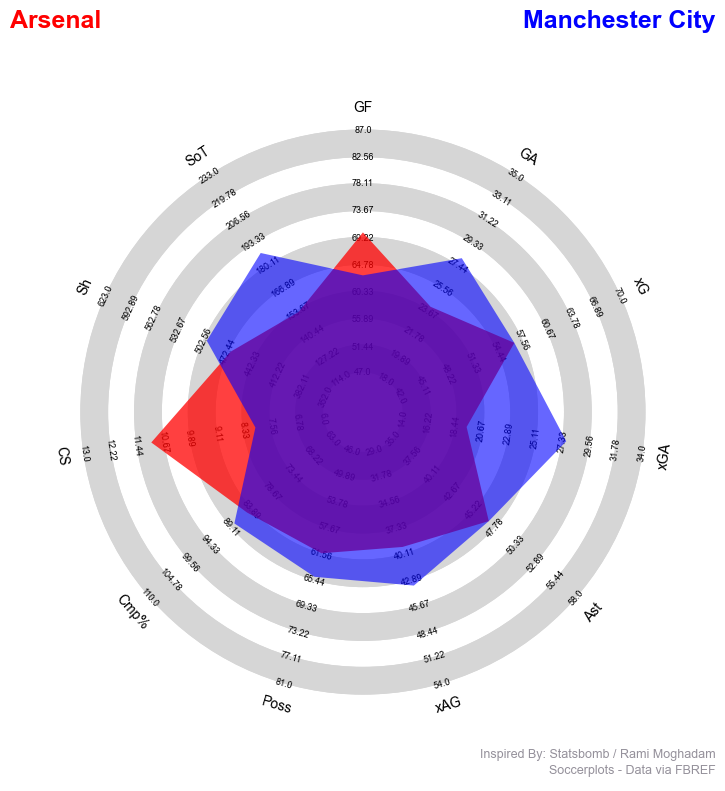

In [85]:
from soccerplots.radar_chart import Radar

radar = Radar(fontfamily="Arial")
fig,ax = radar.plot_radar(ranges=ranges,params=selected_metrics,values=values,
                         radar_color=[color_1,color_2],
                         alphas=[.75,.6],title=title,endnote=endnote,
                         compare=True)